In [8]:
import json
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [9]:
def find_feature_by_osm_id(geojson_data, osm_id):
    """
    Find a feature in the GeoJSON data by its osm_id or osm_way_id.
    """
    for feature in geojson_data["features"]:
        if "properties" in feature and ("osm_id" in feature["properties"] or "osm_way_id" in feature["properties"]):
            if "osm_id" in feature["properties"] and feature["properties"]["osm_id"] == osm_id:
                return feature
            elif "osm_way_id" in feature["properties"] and feature["properties"]["osm_way_id"] == osm_id:
                return feature
    return None

In [10]:
def find_feature(input_file,id):
    with open(input_file, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)
    feature = find_feature_by_osm_id(geojson_data, id)
    return feature

In [11]:
def pretty_print(feature):
    pretty_json = json.dumps(feature, indent=4)
    print(pretty_json)

In [12]:
def extract_coordinates(feature):
    """
    Extract x and y coordinates from the feature.
    """
    if "geometry" in feature and "coordinates" in feature["geometry"]:
        coordinates = feature["geometry"]["coordinates"]
        return coordinates[0]
    return None

In [13]:
def plot(feature):
    sets = extract_coordinates(feature)
        
    if sets:
        # Assuming `sets` is a list of sets, each containing x, y coordinates

        plt.gca().set_aspect('equal')
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']  
        # List of colors to alternate
        for set in sets:
            
            hull = ConvexHull(set)
            hull_points = [set[vertex] for vertex in hull.vertices]
            
            x1, y1 = zip(*set)
            
            plt.plot(x1, y1, marker='o', linestyle='-')
            for x, y in set:
                plt.text(x, y, f'({x:.4f}, {y:.4f})', fontsize=8)
            
            plt.plot([point[0] for point in hull_points], [point[1] for point in hull_points], 'ro-', label='Convex Hull Points')

        plt.legend()
        plt.show()

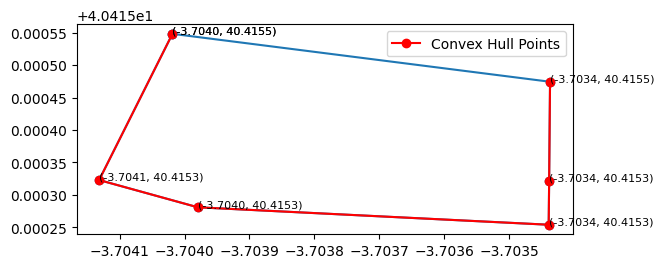

{
    "type": "Feature",
    "properties": {
        "osm_id": null,
        "osm_way_id": "314795177",
        "name": "Teatro Alb\u00e9niz",
        "admin_level": null,
        "man_made": null,
        "type": null,
        "amenity": "theatre",
        "barrier": null,
        "building": "yes",
        "historic": null,
        "landuse": null,
        "leisure": null,
        "military": null,
        "natural": null,
        "office": null,
        "place": null,
        "shop": null,
        "sport": null,
        "tourism": null,
        "other_tags": "\"addr:city\"=>\"Madrid\",\"addr:housenumber\"=>\"11\",\"addr:postcode\"=>\"28012\",\"addr:street\"=>\"Calle de la Paz\",\"capacity\"=>\"898\",\"contact:phone\"=>\"+34 911 231 099\",\"description:en\"=>\"Recognized as a historic building of cultural interest by the Community of Madrid, the Alb\u00e9niz Theater is located inside the new UMusic Hotel Madrid, in the heart of the city's music and entertainment scene. Recently refur

In [17]:
input_file = 'cleaned7.geojson'
ID = "314795177"

feature = find_feature(input_file,ID)
plot(feature)
pretty_print(feature)